In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import plotly.offline as py
import plotly.graph_objs as go

import matplotlib.pyplot as plt

py.init_notebook_mode(connected=True)

In [2]:
# utils
def plot_line(labels, values, extra_info, name):
    py.iplot({
        "data": [go.Scatter(
            x=labels,
            y=values,
            text=extra_info
        )],
        "layout": go.Layout(
            title=name
        )
    })

R squared value: 0.00031327951682016167


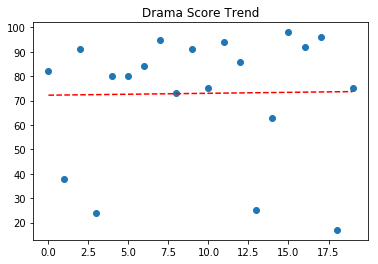

R squared value: 0.03379836411749594


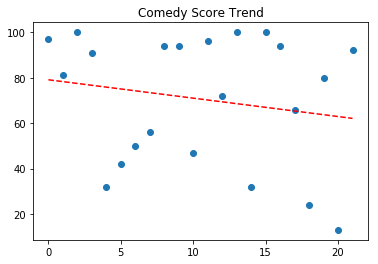

In [6]:
netflix_df = pd.read_csv("data/netflix_rt.csv")

def pyplot_lines(data, title):
    x = [i for i in range(data.shape[0])]
    plt.title(title)
    plt.scatter(x, data)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, data)
    print("R squared value:", r_value**2)
    #print(2.3*x)
    #plt.plot(x, intercept + slope*x, "r", label="scipy")
    z = np.polyfit(x, data, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--", label="numpy")
    plt.show()

def plotly_lines():
    dramas = netflix_df.loc[netflix_df['CATEGORY'] == 'DRAMA']
    plot_line(dramas['DATE'], dramas['SCORE'], dramas['TITLE'], "Drama Scores over time")
    
    comedies = netflix_df.loc[netflix_df['CATEGORY'] == 'COMEDY']
    plot_line(comedies['DATE'], comedies['SCORE'], comedies['TITLE'], "Comedy Scores over time")
    
pyplot_lines(netflix_df.loc[netflix_df['CATEGORY'] == 'DRAMA']['SCORE'], "Drama Score Trend")
pyplot_lines(netflix_df.loc[netflix_df['CATEGORY'] == 'COMEDY']['SCORE'], "Comedy Score Trend")

plotly_lines()